<a href="https://colab.research.google.com/github/dzeko5959/AI/blob/main/ML/UDEM/A1_3_Seunghyeon_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import the CSV file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving A1.3 NASA.csv to A1.3 NASA.csv


In [ ]:
import pandas as pd

df = pd.read_csv("A1.3 NASA.csv") # Read "A1.3 NASA.csv" file

**2. Data segmentation**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate independent variables (X) and dependent variables (y)
X = df.drop(columns=["presion"])  # Exclude variables to predict
y = df["presion"]  # dependent variable

# Data segmentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Size Output
print("Size of training set :", X_train.shape, y_train.shape)
print("Size of test set :", X_test.shape, y_test.shape)

# Verifying the number of data
assert X_train.shape[0] + X_test.shape[0] == df.shape[0], "Data segmentation error!"

Size of training set : (1052, 5) (1052,)
Size of test set : (451, 5) (451,)


**3. Training multiple linear regression models**

In [ ]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit() # Regression model training
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          1.38e-164
Time:                        13:16:28   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4778      0.651    203.367      0.0

(1) R-squared = 0.521 → model may account for 52.1% variability

(2) Regression coefficient (coef) and interpretation


*   Precuencia, angulo, longitude, espesor → direction of decreasing presion (negative)
*   Velocidad → Direction to increase presion (positive)
*   Espresso has the greatest impact → -157.2017 with the greatest slope

**4. Analyzing Significant Variables**

In [ ]:
p_values = model.pvalues # Extraction of p-value

p_values_no_const = p_values.drop("const")
# Find significant variables (p-value < 0.05)
significant_vars = p_values_no_const[p_values_no_const < 0.05].index.tolist()

# Most significant variable (the variable with the lowest p-value)
most_important_var = p_values_no_const.idxmin()

print("Significant variable :", significant_vars)
print("Most significant variable :", most_important_var)
print("Selection criteria: the variable with the lowest p-value")

Significant variable : ['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor']
Most significant variable : frecuencia
Selection criteria: the variable with the lowest p-value


**5. Model Performance Evaluation**

In [ ]:
import numpy as np

# Training Data Performance Evaluation
train_rse = np.sqrt(model.scale)  # RSE
train_r2 = model.rsquared  # R**2

# Test Data Performance Evaluation
X_test_const = sm.add_constant(X_test)  # Constant
y_pred = model.predict(X_test_const)  # Calculation of prediction values
residuals = y_test - y_pred  # 잔차

# RSE & R**2 of test data
test_rse = np.sqrt(np.sum(residuals**2) / len(y_test))
test_r2 = 1 - (np.sum(residuals**2) / np.sum((y_test - np.mean(y_test))**2))

print("Residual Standard Error of training data :", train_rse)
print("R**2 of training data :", train_r2)
print("Residual Standard Error of test data :", test_rse)
print("R**2 of test data :", test_r2)

Residual Standard Error of training data : 4.791436345798008
R**2 of training data : 0.5214416938715567
Residual Standard Error of test data : 4.867017391586263
R**2 of test data : 0.498272658793777


**6. Visualize results**

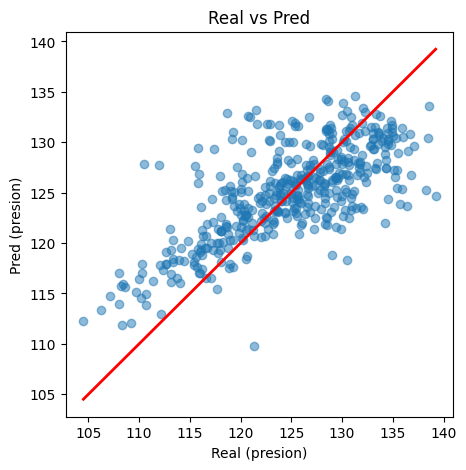

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)

plt.xlabel("Real (presion)")
plt.ylabel("Pred (presion)")
plt.title("Real vs Pred")
plt.show()

Conclusion : In the graph, the predicted and actual values are gathered in a 45-degree straight line, so it is considered a relatively good model